In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import plotly.express as px
import plotly.graph_objs as go



Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print (f'We have {df.shape[0]} instances with the {df.shape[1]-1} features and 1 output variable')

We have 303 instances with the 13 features and 1 output variable


In [5]:
df.duplicated().sum()

1

In [6]:
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

In [8]:
print (f'We have {df.shape[0]} instances with the {df.shape[1]-1} features and 1 output variable')

We have 302 instances with the 13 features and 1 output variable


In [9]:
df.shape

(302, 14)

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [12]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

# Target Variable

In [13]:
y = df['target']
print(f'Percentage of patient had a stroke: % {round(y.value_counts(normalize=True)[1]*100,2)} --> ({y.value_counts()[1]} patient)\nPercentage of patient did not have a stroke: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} patient)')

Percentage of patient had a stroke: % 54.3 --> (164 patient)
Percentage of patient did not have a stroke: % 45.7 --> (138 patient)


In [14]:
df.target.value_counts(normalize=True)

1    0.543046
0    0.456954
Name: target, dtype: float64

In [15]:
df.target.value_counts().iplot(kind="bar", title="Target")

- 138 patient does not have a stroke which is %45.4 of the instances of our target variable.
- 164 patient have a stroke which is %54,3 of the instances of our target variable.

We have almost balanced data.

# Metric

- Recall

# Numerical Columns

In [16]:
num_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

In [17]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [18]:
skew = df[num_cols].skew()
high_skew = skew[skew > 0.75]
high_skew_cols = high_skew.index.to_list()

In [19]:
df[num_cols].iplot(kind="histogram")

In [20]:
df[num_cols].iplot(kind="histogram", subplots=True)

In [21]:
df[num_cols].iplot(kind="box", boxpoints="outliers")

In [22]:
df[num_cols].iplot(kind="box", subplots=True, boxpoints="outliers")

# Categorical Columns

In [23]:
cat_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

## Sex

In [24]:
print(df.sex.value_counts(normalize=True))
df.sex.value_counts().iplot(kind="bar", title="Sex")

1    0.682119
0    0.317881
Name: sex, dtype: float64


- According to our data dictionary, 1 = male and 0 = female. We may want to dummy variable this column.

## cp

In [25]:
print(df.cp.value_counts(normalize=True))
df.cp.value_counts().iplot(kind="bar", title="Cp")

0    0.473510
2    0.284768
1    0.165563
3    0.076159
Name: cp, dtype: float64


- cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic.

- It may be better to use OneHotEncoder in this feature. It is encoded as Ordinal and this may be wrong.

## fbs

In [26]:
print(df.fbs.value_counts(normalize=True))
df.fbs.value_counts().iplot(kind="bar", title="fbs")

0    0.850993
1    0.149007
Name: fbs, dtype: float64


- (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- This feature seems right.

## restecg

In [27]:
print(df.restecg.value_counts(normalize=True))
df.restecg.value_counts().iplot(kind="bar", title="restecg")

1    0.500000
0    0.486755
2    0.013245
Name: restecg, dtype: float64


- resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- It may be better to use OneHotEncoder in this feature. It is encoded as Ordinal and this may be wrong.

## exang

In [28]:
print(df.exang.value_counts(normalize=True))
df.exang.value_counts().iplot(kind="bar", title="exang")

0    0.672185
1    0.327815
Name: exang, dtype: float64


- exercise induced angina (1 = yes; 0 = no)
- This feature seems right.

## slope

In [29]:
print(df.slope.value_counts(normalize=True))
df.slope.value_counts().iplot(kind="bar", title="slope")

2    0.466887
1    0.463576
0    0.069536
Name: slope, dtype: float64


- the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping
- It may be better to use OneHotEncoder in this feature. It is encoded as Ordinal and this may be wrong.

## ca

In [30]:
print(df.ca.value_counts(normalize=True))
df.ca.value_counts().iplot(kind="bar", title="ca")

0    0.579470
1    0.215232
2    0.125828
3    0.066225
4    0.013245
Name: ca, dtype: float64


- number of major vessels (0-3) colored by flourosopy
- This feature seems right.

## thal

In [31]:
print(df.thal.value_counts(normalize=True))
df.thal.value_counts().iplot(kind="bar", title="thal")

2    0.546358
3    0.387417
1    0.059603
0    0.006623
Name: thal, dtype: float64


- thal: A blood disorder called thalassemia 
- Value 0: NULL (dropped from the dataset previously
- Value 1: fixed defect (no blood flow in some part of the heart)
- Value 2: normal blood flow
- Value 3: reversible defect (a blood flow is observed but it is not normal)

- It may be better to use OneHotEncoder in this feature. It is encoded as Ordinal and this may be wrong.

In [32]:
df.drop(df[df["thal"]==0].index, inplace=True)

# Bivariate Analysis

## sex and stroke

In [33]:
print (f'A female person has a probability of \033[1m{round(df[df["sex"]==0]["target"].mean()*100,2)}%\033[0m get a stroke')
print (f'A male person has a probability of \033[1m{round(df[df["sex"]==1]["target"].mean()*100,2)}%\033[0m get a stroke')

A female person has a probability of 74.74% get a stroke
A male person has a probability of 44.88% get a stroke


In [34]:
male_target = df[df["sex"]==1].target.value_counts()
female_target = df[df["sex"]==0].target.value_counts()
df1 = pd.DataFrame([male_target, female_target])
df1.index = ["Male", "Female"]
df1.columns = ["Not Stroke", "Stroke"]
df1.iplot(kind="bar", title="Stroke & Sex")

## cp and stroke

In [35]:
round(df[df["cp"]==0]["target"].mean()*100,2)

27.46

In [36]:
print(f"A person with a chest pain of typical angina pain (cp=0) has a probability of \033[1m{round(df[df['cp']==0]['target'].mean()*100,2)}%\033[0m get a stroke")
print(f"A person with a chest pain of atypical angina pain (cp=1) has a probability of \033[1m{round(df[df['cp']==1]['target'].mean()*100,2)}%\033[0m get a stroke")
print(f"A person with a chest pain of non-anginal pain (cp=2) has a probability of \033[1m{round(df[df['cp']==2]['target'].mean()*100,2)}%\033[0m get a stroke")
print(f"A person with a chest pain of asymptomatic (cp=3) has a probability of \033[1m{round(df[df['cp']==3]['target'].mean()*100,2)}%\033[0m get a stroke")

A person with a chest pain of typical angina pain (cp=0) has a probability of 27.46% get a stroke
A person with a chest pain of atypical angina pain (cp=1) has a probability of 82.0% get a stroke
A person with a chest pain of non-anginal pain (cp=2) has a probability of 78.82% get a stroke
A person with a chest pain of asymptomatic (cp=3) has a probability of 69.57% get a stroke


In [37]:
cp0_target = df[df["cp"]==0].target.value_counts()
cp1_target = df[df["cp"]==1].target.value_counts()
cp2_target = df[df["cp"]==2].target.value_counts()
cp3_target = df[df["cp"]==3].target.value_counts()


df1 = pd.DataFrame([cp0_target, cp1_target, cp2_target, cp3_target])
df1.index = ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"]
df1.columns = ["Not Stroke", "Stroke"]

df1.iplot(kind="bar",  title="Stroke & Chest Pain Type")

## fbs and stroke

In [38]:
print(f"A person with a fasting blood sugar lower than 120 mg/dl (fbs=0) has a probability of \033[1m{round(df[df['fbs']==0]['target'].mean()*100,2)}%\033[0m get a stroke")
print(f"A person with a fasting blood sugar higher than 120 mg/dl (fbs=1) has a probability of \033[1m{round(df[df['fbs']==1]['target'].mean()*100,2)}%\033[0m get a stroke")

A person with a fasting blood sugar lower than 120 mg/dl (fbs=0) has a probability of 54.69% get a stroke
A person with a fasting blood sugar higher than 120 mg/dl (fbs=1) has a probability of 52.27% get a stroke


In [39]:
cp0_target = df[df["fbs"]==0].target.value_counts().sort_values()
cp1_target = df[df["fbs"]==1].target.value_counts().sort_values()


df1 = pd.DataFrame([cp0_target, cp1_target])
df1.index = ["lower than 120 mg/dl", "higher than 120 mg/dl"]
df1.columns = ["Not Stroke", "Stroke"]

df1.iplot(kind="bar",  title="Stroke & Fasting Blood Sugar")

## restecg and stroke

In [40]:
print(f"A person with a restecg as 0 has a probability of \033[1m{round(df[df['restecg']==0]['target'].mean()*100,2)}%\033[0m get a stroke")
print(f"A person with a restecg as 1 has a probability of \033[1m{round(df[df['restecg']==1]['target'].mean()*100,2)}%\033[0m get a stroke")
print(f"A person with a restecg as 2 has a probability of \033[1m{round(df[df['restecg']==2]['target'].mean()*100,2)}%\033[0m get a stroke")

A person with a restecg as 0 has a probability of 45.89% get a stroke
A person with a restecg as 1 has a probability of 63.33% get a stroke
A person with a restecg as 2 has a probability of 25.0% get a stroke


In [41]:
cp0_target = df[df["restecg"]==0].target.value_counts()
cp1_target = df[df["restecg"]==1].target.value_counts()
cp2_target = df[df["restecg"]==2].target.value_counts()


df1 = pd.DataFrame([cp0_target, cp1_target, cp2_target])
df1.index = ["normal", "having ST-T wave abnormality", "left ventricular hypertrophy"]
df1.columns = ["Not Stroke", "Stroke"]

df1.iplot(kind="bar",  title="Stroke & Chest Pain Type")

## exang and stroke

In [42]:
print(f"A person with a not exercise induced angina (exang=0) has a probability of \033[1m{round(df[df['exang']==0]['target'].mean()*100,2)}%\033[0m get a stroke")
print(f"A person with a exercise induced angina (exang=1) has a probability of \033[1m{round(df[df['exang']==1]['target'].mean()*100,2)}%\033[0m get a stroke")

A person with a not exercise induced angina (exang=0) has a probability of 69.31% get a stroke
A person with a exercise induced angina (exang=1) has a probability of 23.47% get a stroke


In [43]:
cp0_target = df[df["exang"]==0].target.value_counts()
cp1_target = df[df["exang"]==1].target.value_counts()


df1 = pd.DataFrame([cp0_target, cp1_target])
df1.index = ["not exercise induced angina", "exercise induced angina"]
df1.columns = ["Not Stroke", "Stroke"]

df1.iplot(kind="bar",  title="Stroke & Exercise Induced Angina")

## slope and stroke

In [44]:
print(f"A person with a the slope of the peak exercise ST segment as upsloping (slope=0) has a probability of \033[1m{round(df[df['slope']==0]['target'].mean()*100,2)}%\033[0m get a stroke")
print(f"A person with a the slope of the peak exercise ST segment as flat (slope=1) has a probability of \033[1m{round(df[df['slope']==1]['target'].mean()*100,2)}%\033[0m get a stroke")
print(f"A person with a the slope of the peak exercise ST segment as downsloping (slope=2) has a probability of \033[1m{round(df[df['slope']==2]['target'].mean()*100,2)}%\033[0m get a stroke")

A person with a the slope of the peak exercise ST segment as upsloping (slope=0) has a probability of 42.86% get a stroke
A person with a the slope of the peak exercise ST segment as flat (slope=1) has a probability of 35.25% get a stroke
A person with a the slope of the peak exercise ST segment as downsloping (slope=2) has a probability of 75.0% get a stroke


In [45]:
cp0_target = df[df["slope"]==0].target.value_counts()
cp1_target = df[df["slope"]==1].target.value_counts()
cp2_target = df[df["slope"]==2].target.value_counts()


df1 = pd.DataFrame([cp0_target, cp1_target, cp2_target])
df1.index = ["upsloping", "flat", "downsloping"]
df1.columns = ["Not Stroke", "Stroke"]

df1.iplot(kind="bar",  title="Stroke & the Slope of the Peak Exercise")

## ca and stroke

In [46]:
print(f"A person with a number of major vessels as 0 (ca=0) has a probability of \033[1m{round(df[df['ca']==0]['target'].mean()*100,2)}%\033[0m get a stroke")
print(f"A person with a number of major vessels as 1 (ca=1) has a probability of \033[1m{round(df[df['ca']==1]['target'].mean()*100,2)}%\033[0m get a stroke")
print(f"A person with a number of major vessels as 2 (ca=2) has a probability of \033[1m{round(df[df['ca']==2]['target'].mean()*100,2)}%\033[0m get a stroke")
print(f"A person with a number of major vessels as 3 (ca=3) has a probability of \033[1m{round(df[df['ca']==3]['target'].mean()*100,2)}%\033[0m get a stroke")
print(f"A person with a number of major vessels as 4 (ca=4) has a probability of \033[1m{round(df[df['ca']==4]['target'].mean()*100,2)}%\033[0m get a stroke")

A person with a number of major vessels as 0 (ca=0) has a probability of 74.57% get a stroke
A person with a number of major vessels as 1 (ca=1) has a probability of 32.31% get a stroke
A person with a number of major vessels as 2 (ca=2) has a probability of 18.42% get a stroke
A person with a number of major vessels as 3 (ca=3) has a probability of 15.0% get a stroke
A person with a number of major vessels as 4 (ca=4) has a probability of 75.0% get a stroke


In [47]:
cp0_target = df[df["ca"]==0].target.value_counts()
cp1_target = df[df["ca"]==1].target.value_counts()
cp2_target = df[df["ca"]==2].target.value_counts()
cp3_target = df[df["ca"]==3].target.value_counts()
cp4_target = df[df["ca"]==4].target.value_counts()


df1 = pd.DataFrame([cp0_target, cp1_target, cp2_target, cp3_target, cp4_target])
df1.index = ["0 major vessel", "1 major vessel", "2 major vessels", "3 major vessels", "4 major vessels"]
df1.columns = ["Not Stroke", "Stroke"]

df1.iplot(kind="bar",  title="Stroke & Number of Major Vessels")

## thal and stroke

In [48]:
print(f"A person with a thalassemia as fixed defect (thal=1) has a probability of \033[1m{round(df[df['thal']==1]['target'].mean()*100,2)}%\033[0m get a stroke")
print(f"A person with a thalassemia as normal blood flow (thal=2) has a probability of \033[1m{round(df[df['thal']==2]['target'].mean()*100,2)}%\033[0m get a stroke")
print(f"A person with a thalassemia as reversible defect (thal=3) has a probability of \033[1m{round(df[df['thal']==3]['target'].mean()*100,2)}%\033[0m get a stroke")

A person with a thalassemia as fixed defect (thal=1) has a probability of 33.33% get a stroke
A person with a thalassemia as normal blood flow (thal=2) has a probability of 78.18% get a stroke
A person with a thalassemia as reversible defect (thal=3) has a probability of 23.93% get a stroke


In [49]:
cp1_target = df[df["thal"]==1].target.value_counts()
cp2_target = df[df["thal"]==2].target.value_counts()
cp3_target = df[df["thal"]==3].target.value_counts()


df1 = pd.DataFrame([cp1_target, cp2_target, cp3_target])
df1.index = ["fixed defect", "normal blood flow", "reversible defect"]
df1.columns = ["Not Stroke", "Stroke"]

df1.iplot(kind="bar",  title="Stroke & Thalassemia")

# Correlation Matrix & Scatter Plots

In [50]:
df[num_cols].corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.282915,0.206558,-0.397405,0.205844
trestbps,0.282915,1.000000,0.124519,-0.049065,0.194248
chol,0.206558,0.124519,1.000000,-0.007559,0.048360
thalach,-0.397405,-0.049065,-0.007559,1.000000,-0.348520
oldpeak,0.205844,0.194248,0.048360,-0.348520,1.000000


In [51]:
df.groupby('target')[num_cols].mean()

,age,trestbps,chol,thalach,oldpeak
target,,,,,
0,56.635036,134.445255,251.430657,138.978102,1.589781
1,52.582822,129.257669,242.803681,158.644172,0.590184


In [52]:
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', "target"]].corr()

,age,trestbps,chol,thalach,oldpeak,target
age,1.000000,0.282915,0.206558,-0.397405,0.205844,-0.222752
trestbps,0.282915,1.000000,0.124519,-0.049065,0.194248,-0.146902
chol,0.206558,0.124519,1.000000,-0.007559,0.048360,-0.083037
thalach,-0.397405,-0.049065,-0.007559,1.000000,-0.348520,0.428683
oldpeak,0.205844,0.194248,0.048360,-0.348520,1.000000,-0.428568
target,-0.222752,-0.146902,-0.083037,0.428683,-0.428568,1.000000


<AxesSubplot:>

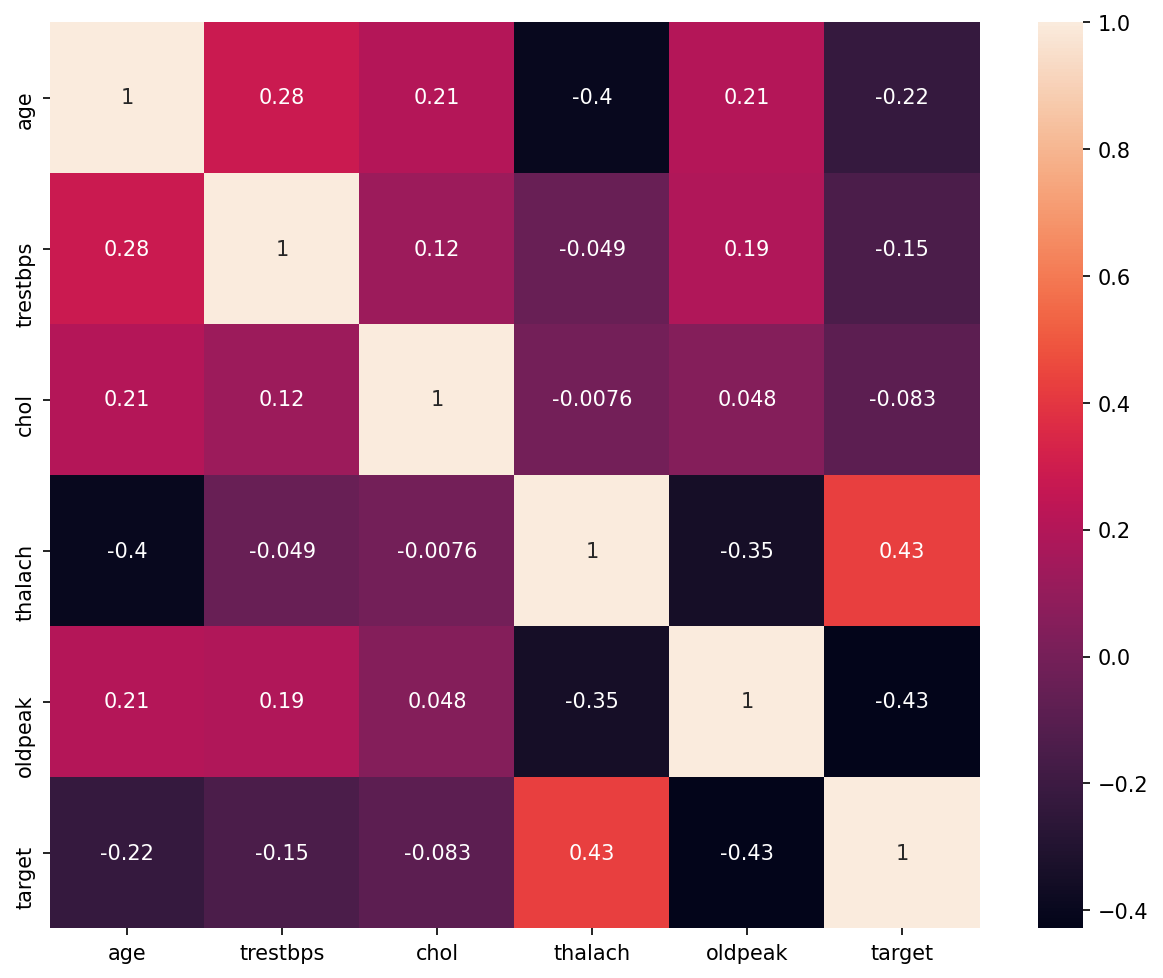

In [53]:
plt.figure(figsize=(10,8), dpi=150)
sns.heatmap(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', "target"]].corr(), annot=True)

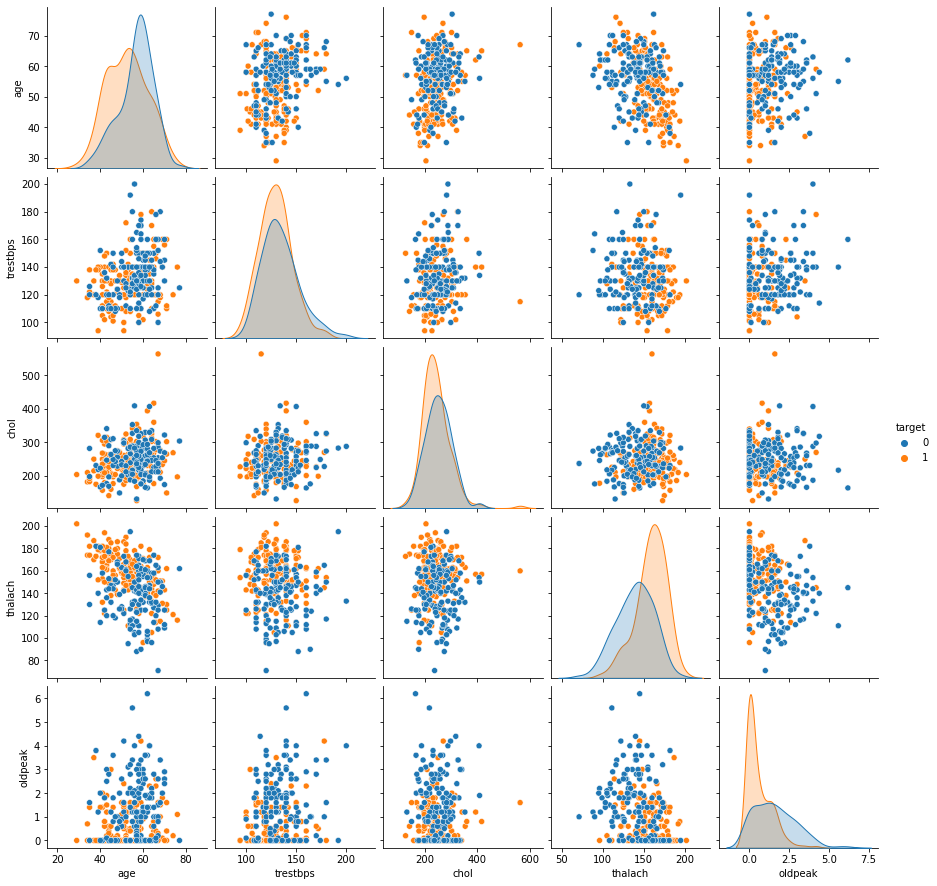

In [54]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', "target"]], hue="target");

# Base Models

In [55]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


n_splits=10
random_state=1845

In [56]:
X = df.drop(columns="target")
y = df.target

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [58]:
models = []

models.append(("LR", LogisticRegression(max_iter=100000)))
models.append(("KNN", KNeighborsClassifier()))
models.append(("SVC", SVC()))

In [59]:
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring="recall")
    
    results.append(scores)
    names.append(name)
    
    print(f"{name}: {round(scores.mean(), 4)}")

LR: 0.8494
KNN: 0.7083
SVC: 0.7987


In [60]:
results = pd.DataFrame(results, index=names, columns=[i for i in range(1,11)]).T
results

,LR,KNN,SVC
1,0.750000,0.500000,0.750000
2,1.000000,0.666667,1.000000
3,0.833333,0.666667,0.583333
4,0.916667,0.666667,0.666667
5,0.916667,0.583333,0.833333
6,0.846154,0.692308,0.769231
7,0.846154,0.846154,0.846154
8,1.000000,0.692308,0.692308
9,0.692308,0.846154,0.846154
10,0.692308,0.923077,1.000000


In [61]:
results.iplot(kind="box", boxpoints="all")

# Standart Scaler

In [62]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [63]:
num_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [64]:
trans = ColumnTransformer([("scaler", StandardScaler(), num_cols)], remainder="passthrough")

In [65]:
results = []
names = []

for name, model in models:
    pipe = Pipeline([("trans", trans), ("model", model)])
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    scores = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring="recall")
    
    results.append(scores)
    names.append(name)
    
    print(f"{name}: {round(scores.mean(), 4)}")

LR: 0.8571
KNN: 0.8308
SVC: 0.8885


In [66]:
results = pd.DataFrame(results, index=names, columns=[i for i in range(1,11)]).T
results

,LR,KNN,SVC
1,0.750000,0.750000,0.833333
2,1.000000,1.000000,1.000000
3,0.833333,0.833333,0.916667
4,0.916667,0.833333,0.916667
5,0.916667,0.583333,0.833333
6,0.846154,0.846154,0.923077
7,0.846154,1.000000,0.923077
8,1.000000,0.846154,0.923077
9,0.769231,0.846154,0.846154
10,0.692308,0.769231,0.769231


In [67]:
results.iplot(kind="box", boxpoints="all")

# MinMax Scaler

In [68]:
results = []
names = []

for name, model in models:
    pipe = Pipeline([("scaler", MinMaxScaler()), ("model", model)])
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    scores = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring="recall")
    
    results.append(scores)
    names.append(name)
    
    print(f"{name}: {round(scores.mean(), 4)}")

LR: 0.8494
KNN: 0.775
SVC: 0.8077


In [69]:
results = pd.DataFrame(results, index=names, columns=[i for i in range(1,11)]).T
results

,LR,KNN,SVC
1,0.750000,0.666667,0.666667
2,1.000000,0.916667,0.833333
3,0.916667,0.833333,0.916667
4,0.916667,0.833333,0.916667
5,0.833333,0.500000,0.666667
6,0.923077,0.923077,0.923077
7,0.692308,0.692308,0.692308
8,1.000000,1.000000,1.000000
9,0.846154,0.769231,0.846154
10,0.615385,0.615385,0.615385


In [70]:
results.iplot(kind="box", boxpoints="all")

# Ordinal and OHE Transformers

In [71]:
from sklearn.preprocessing import OneHotEncoder

In [72]:
ohe_columns = ["sex", "thal", "slope", "restecg", "cp"]

In [73]:
trans_ohe = ColumnTransformer([("scaler", StandardScaler(), num_cols),
                               ("ohe", OneHotEncoder(handle_unknown="ignore"), ohe_columns)], 
                              remainder="passthrough")

In [74]:
results = []
names = []

for name, model in models:
    pipe = Pipeline([("trans", trans_ohe), ("model", model)])
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    scores = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring="recall")
    
    results.append(scores)
    names.append(name)
    
    print(f"{name}: {round(scores.mean(), 4)}")

LR: 0.8494
KNN: 0.8
SVC: 0.8404


In [75]:
results = pd.DataFrame(results, index=names, columns=[i for i in range(1,11)]).T
results

,LR,KNN,SVC
1,0.750000,0.750000,0.750000
2,1.000000,0.916667,1.000000
3,0.833333,0.666667,0.750000
4,0.916667,0.916667,0.916667
5,0.916667,0.750000,0.833333
6,0.846154,0.846154,0.923077
7,0.846154,0.923077,0.923077
8,0.923077,0.846154,0.846154
9,0.692308,0.769231,0.769231
10,0.769231,0.615385,0.692308


In [76]:
results.iplot(kind="box", boxpoints="all")

# Powertransformer

In [77]:
from sklearn.preprocessing import PowerTransformer

In [78]:
trans_ohe_power = ColumnTransformer([("transformer", PowerTransformer(), high_skew_cols),
                                     ("scaler", StandardScaler(), ["age", "trestbps","thalach"]),
                                     ("ohe", OneHotEncoder(handle_unknown="ignore"), ohe_columns)], 
                                      remainder="passthrough")

In [79]:
results = []
names = []

for name, model in models:
    pipe = Pipeline([("trans", trans_ohe_power), ("model", model)])
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    scores = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring="recall")
    
    results.append(scores)
    names.append(name)
    
    print(f"{name}: {round(scores.mean(), 4)}")

LR: 0.8263
KNN: 0.791
SVC: 0.8404


In [80]:
results = pd.DataFrame(results, index=names, columns=[i for i in range(1,11)]).T
results

,LR,KNN,SVC
1,0.750000,0.750000,0.833333
2,1.000000,0.916667,1.000000
3,0.833333,0.666667,0.750000
4,0.916667,0.833333,0.833333
5,0.916667,0.666667,0.833333
6,0.846154,0.846154,0.923077
7,0.846154,0.923077,0.846154
8,0.692308,0.923077,0.923077
9,0.692308,0.769231,0.846154
10,0.769231,0.615385,0.615385


In [81]:
results.iplot(kind="box", boxpoints="all")

# Hyperparameter Tuning (StandartScaler)

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve

In [83]:
trans_ohe = ColumnTransformer([("scaler", StandardScaler(), num_cols),
                               ("ohe", OneHotEncoder(handle_unknown="ignore"), ohe_columns)], 
                              remainder="passthrough")

In [84]:
pipe = Pipeline([("preprocessing", trans_ohe),
                 ("model", LogisticRegression())])


params = {
    "model__C": [100, 10, 1, 0.1],
    "model__solver": ['newton-cg', 'lbfgs', 'liblinear']
}

kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

grid_search = GridSearchCV(pipe, param_grid=params, scoring="recall", cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.865385 using {'model__C': 0.1, 'model__solver': 'newton-cg'}
0.833974 (0.094274) with: {'model__C': 100, 'model__solver': 'newton-cg'}
0.833974 (0.094274) with: {'model__C': 100, 'model__solver': 'lbfgs'}
0.833974 (0.094274) with: {'model__C': 100, 'model__solver': 'liblinear'}
0.841667 (0.085092) with: {'model__C': 10, 'model__solver': 'newton-cg'}
0.841667 (0.085092) with: {'model__C': 10, 'model__solver': 'lbfgs'}
0.833974 (0.094274) with: {'model__C': 10, 'model__solver': 'liblinear'}
0.849359 (0.088557) with: {'model__C': 1, 'model__solver': 'newton-cg'}
0.849359 (0.088557) with: {'model__C': 1, 'model__solver': 'lbfgs'}
0.841667 (0.098018) with: {'model__C': 1, 'model__solver': 'liblinear'}
0.865385 (0.084654) with: {'model__C': 0.1, 'model__solver': 'newton-cg'}
0.865385 (0.084654) with: {'model__C': 0.1, 'model__solver': 'lbfgs'}
0.841667 (0.096965) with: {'model__C': 0.1, 'model__solver': 'liblinear'}


In [85]:
grid_result.best_params_

{'model__C': 0.1, 'model__solver': 'newton-cg'}

In [86]:
tuned_model = LogisticRegression(C=0.1, solver="newton-cg")

In [87]:
pipe = Pipeline([("preprocessing", trans),
                 ("model", tuned_model)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
y_pred_proba = pipe.predict_proba(X_test)

In [88]:
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[19  3]
 [ 1 37]]

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        22
           1       0.93      0.97      0.95        38

    accuracy                           0.93        60
   macro avg       0.94      0.92      0.93        60
weighted avg       0.93      0.93      0.93        60



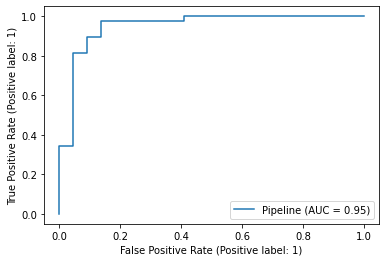

In [89]:
plot_roc_curve(pipe, X_test, y_test, response_method='auto');

In [90]:
kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
scores = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring="recall")

In [91]:
logreg = pd.DataFrame(scores, index=["cv"+str(i) for i in range(1, 11)], columns=["recall"])
logreg

,recall
cv1,0.833333
cv2,1.000000
cv3,0.916667
cv4,0.916667
cv5,1.000000
cv6,0.846154
cv7,0.923077
cv8,0.923077
cv9,0.769231
cv10,0.769231


In [92]:
logreg["recall"].mean()

0.8897435897435898

In [93]:
logreg.iplot(kind="box", boxpoints="all")